# Classification

In [26]:
import numpy as np


def euclidian_dist(point_1: list[int | float], point_2: list[int | float]) -> float:
    """ 
    Returns the euclidian distance between two points
    """
    res = []
    for p_1, p_2 in zip(point_1, point_2):
        res.append(abs(p_1 - p_2)**2)
        
    return sum(res)**(1/2)
    

def manhattan_dist(point_1: list[int | float], point_2: list[int | float]) -> float:
    """ 
    Returns the manhattan distance between two points
    """
    res = []
    for p_1, p_2 in zip(point_1, point_2):
        res.append(abs(p_1 - p_2))
        
    return sum(res)


def max_norm_dist(point_1: list[int | float], point_2: list[int | float]) -> float:
    """
    Returns the max norm distance between two points
    """
    res = []
    for p_1, p_2 in zip(point_1, point_2):
        res.append(abs(p_1 - p_2))
        
    return max(res)


def weigthed_euclidian_dist(point_1: list[int | float],
                            point_2: list[int | float],
                            weights: list[int | float]) -> float:
    """
    Returns the weighted euclidian distance between two points and a list of weights
    The length of the array must be the same as the length of the points
    """
    res = []
    for p_1, p_2, w in zip(point_1, point_2, weights):
        res.append(w * (abs(p_1 - p_2)))
        
    return sum(res)**(1/2)


def quadratic_dist(point_1: list[int | float],
                   point_2: list[int | float],
                   w_matrix: list[list[int | float]]) -> float:
    """ 
    Returns the quadratic distance
    """
    point_1 = np.array(point_1)
    point_2 = np.array(point_2)
    w_matrix = np.array(w_matrix)
    return ((point_1 - point_2) @ w_matrix @ (np.transpose(point_1) - np.transpose(point_2)))**(1/2)


def custom_dist(point_1: list[int | float],
                point_2: list[int | float],
                p: int | float) -> float:
    """ 
    """
    
    res = []
    for p_1, p_2 in zip(point_1, point_2):
        res.append((abs(p_1 - p_2))**p)
        
    return sum(res)**(1/p) 

In [4]:
# Basic hypothesis algorithm


training = [["sunny", "warm", "normal", "strong", "warm", "same", "yes"],
            ["sunny", "warm", "high", "strong", "warm", "same", "yes"],
            ["rainy", "cold", "high", "strong", "warm", "change", "no"],
            ["sunny", "warm", "high", "strong", "cool", "change", "yes"]
            ]


def create_hypothesis(training_data, negtaive_label):
    i = 0
    hypthesis = []
    for train in training_data:
        
        if train[-1] == negtaive_label:
            continue
        
        if i == 0:
            hypthesis = train
            i += 1
            continue
        for j, a in enumerate(train):
            if a == hypthesis[j]:
                continue
            else:
                hypthesis[j] = "?"
        i += 1
    return hypthesis

create_hypothesis(training, "no")
        

['sunny', 'warm', '?', 'strong', '?', '?', 'yes']

# Exercise 6  

![title](imgs/Screenshot_6.png)

![title](imgs/Screenshot_1.png)  

Let us get the definitions completely right:  
    - TP: True positives  
    - TN: True negatives
    - FP: False positives
    - FN: False negativs  

which is equvilant to this:  
![title](imgs/Billede1.png)  


Remember:  

![title](imgs/Screenshot_3.png)

Therefore:  

Precision = TP / TP + FP  

Recall = TP / TP + FN

![title](imgs/Screenshot_5.png)  

Note that the weigted average is the same as the micro average

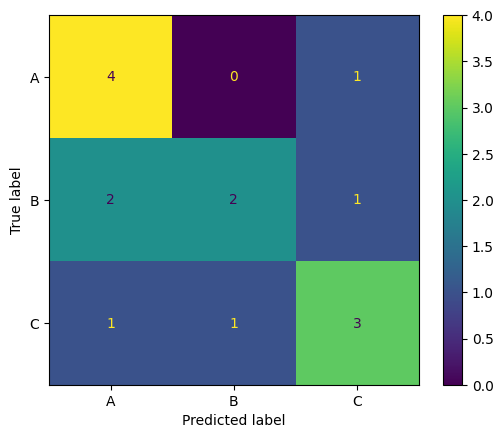

              precision    recall  f1-score   support

           A       0.57      0.80      0.67         5
           B       0.67      0.40      0.50         5
           C       0.60      0.60      0.60         5

    accuracy                           0.60        15
   macro avg       0.61      0.60      0.59        15
weighted avg       0.61      0.60      0.59        15



In [24]:
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


def confusion_matrix(actual, predicted):
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
    cm_display.from_predictions(actual, predicted)
    #cm_display.plot()
    plt.show()
    print(classification_report(actual, predicted))    
    

actual = ["A", "B", "A", "C", "C", "B", "A", "A", "A", "B", "B", "C", "C", "C", "B"]
predicted = ["A", "A", "C", "C", "B", "B", "A", "A", "A", "C", "A", "A", "C", "C", "B"]
confusion_matrix(actual, predicted)

![title](imgs/Screenshot_7.png)

![title](imgs/Screenshot_8.png)  

The best that a classifier can do is 50%, so the true error rate will be 0,5

![title](imgs/Screenshot_9.png)  

At each step the true error rate will be |number of misclassifications - 1| / |number of predictions - 1| but the final result will converge on 0,5

![title](imgs/Screenshot_10.png)

In [25]:
# We know that the error rate will 0,5 therefore

(0.632 * 0.5) + (0.368 * 0.5) 

0.5

![title](imgs/Screenshot_11.png)

In [53]:
#points = [[1, 3], [1, 8], [1, 9], [4, 6], [5, 4], [5, 7], [6, 1], [6, 3], [6, 8], [7, 2], [7, 4], [7, 6], [8, 2], [8, 3]]
# Note that c = circles and s = squares
#classes = ["c", "c", "c", "c", "s", "c", "s", "s", "c", "s", "s", "c", "s", "s"]

#queries = [[6, 6]]


def get_k_smallest_indeces(input_list, k):
    return sorted(range(len(input_list)), key=lambda sub: input_list[sub])[:k]

def get_most_frequent_value(input_list):
    return max(input_list, key = input_list.count)

def knn_manhattan(queries: list[ int | float],
                  points: list[int | float],
                  classes: list[int | float | str],
                  k: int):
    """
    Knn, takes a list of query points, a list of points and a list of its known classes along with k
    """
    for q in queries:
        distances = []
        for p in points:
            distances.append(manhattan_dist(q, p))
        
        nearest_neighbours = get_k_smallest_indeces(distances, k)
        neighbour_classes = [classes[neighbour] for neighbour in nearest_neighbours]
        q_class = get_most_frequent_value(neighbour_classes)
        print(f"{k}-nearest neighbours")
        print(f"Point: {q}") 
        print(f"prediced class: {q_class}")
        print(f"k nearest neighbours")
        for i in nearest_neighbours:
            print(f"    - neighbour: {points[i]}")
            print(f"    - distance: {distances[i]}")

def knn_euclidian(queries: list[ int | float],
                  points: list[int | float],
                  classes: list[int | float | str],
                  k: int):
    """
    Knn, takes a list of query points, a list of points and a list of its known classes along with k
    """
    for q in queries:
        distances = []
        for p in points:
            distances.append(euclidian_dist(q, p))
        
        nearest_neighbours = get_k_smallest_indeces(distances, k)
        neighbour_classes = [classes[neighbour] for neighbour in nearest_neighbours]
        q_class = get_most_frequent_value(neighbour_classes)
        print(f"{k}-nearest neighbours")
        print(f"Point: {q}") 
        print(f"prediced class: {q_class}")
        print(f"k nearest neighbours")
        for i in nearest_neighbours:
            print(f"    - neighbour: {points[i]}")
            print(f"    - distance: {distances[i]}")

In [54]:
points = [[1, 3], [1, 8], [1, 9], [4, 6], [5, 4], [5, 7], [6, 1], [6, 3], [6, 8], [7, 2], [7, 4], [7, 6], [8, 2], [8, 3]]
# Note that c = circles and s = squares
classes = ["c", "c", "c", "c", "s", "c", "s", "s", "c", "s", "s", "c", "s", "s"]
queries = [[6, 6]]

In [55]:
knn_manhattan(queries, points, classes, 4)

4-nearest neighbours
Point: [6, 6]
prediced class: c
k nearest neighbours
    - neighbour: [7, 6]
    - distance: 1
    - neighbour: [4, 6]
    - distance: 2
    - neighbour: [5, 7]
    - distance: 2
    - neighbour: [6, 8]
    - distance: 2


In [56]:
knn_manhattan(queries, points, classes, 7)

7-nearest neighbours
Point: [6, 6]
prediced class: c
k nearest neighbours
    - neighbour: [7, 6]
    - distance: 1
    - neighbour: [4, 6]
    - distance: 2
    - neighbour: [5, 7]
    - distance: 2
    - neighbour: [6, 8]
    - distance: 2
    - neighbour: [5, 4]
    - distance: 3
    - neighbour: [6, 3]
    - distance: 3
    - neighbour: [7, 4]
    - distance: 3


In [57]:
knn_manhattan(queries, points, classes, 10)

10-nearest neighbours
Point: [6, 6]
prediced class: s
k nearest neighbours
    - neighbour: [7, 6]
    - distance: 1
    - neighbour: [4, 6]
    - distance: 2
    - neighbour: [5, 7]
    - distance: 2
    - neighbour: [6, 8]
    - distance: 2
    - neighbour: [5, 4]
    - distance: 3
    - neighbour: [6, 3]
    - distance: 3
    - neighbour: [7, 4]
    - distance: 3
    - neighbour: [6, 1]
    - distance: 5
    - neighbour: [7, 2]
    - distance: 5
    - neighbour: [8, 3]
    - distance: 5


# Exam

![title](imgs/Screenshot_12.png)

In [60]:
points = [
    [2, 9], [3, 4], [4, 4],
    [4, 6], [4, 6], [4, 8],
    [5, 2], [5, 7], [6, 1],
    [6, 3], [6, 4], [6, 6],
    [7, 2], [7, 3], [7, 5],
    [8, 2], [8, 5], [8, 9],
    [9, 3]
    ]
classes = [
    "c", "s", "s",
    "s", "s", "s",
    "s" , "s", "s",
    "c", "c", "s",
    "c", "c", "s",
    "c", "c", "s",
    "s"
    ]
queries = [[7, 4]]

**3:** False

In [61]:
knn_manhattan(queries, points, classes, k = 3)

3-nearest neighbours
Point: [7, 4]
prediced class: c
k nearest neighbours
    - neighbour: [6, 4]
    - distance: 1
    - neighbour: [7, 3]
    - distance: 1
    - neighbour: [7, 5]
    - distance: 1


**6:** False

In [62]:
knn_manhattan(queries, points, classes, k = 6)

6-nearest neighbours
Point: [7, 4]
prediced class: c
k nearest neighbours
    - neighbour: [6, 4]
    - distance: 1
    - neighbour: [7, 3]
    - distance: 1
    - neighbour: [7, 5]
    - distance: 1
    - neighbour: [6, 3]
    - distance: 2
    - neighbour: [7, 2]
    - distance: 2
    - neighbour: [8, 5]
    - distance: 2


**10:** False

In [63]:
knn_manhattan(queries, points, classes, k = 10)

10-nearest neighbours
Point: [7, 4]
prediced class: c
k nearest neighbours
    - neighbour: [6, 4]
    - distance: 1
    - neighbour: [7, 3]
    - distance: 1
    - neighbour: [7, 5]
    - distance: 1
    - neighbour: [6, 3]
    - distance: 2
    - neighbour: [7, 2]
    - distance: 2
    - neighbour: [8, 5]
    - distance: 2
    - neighbour: [4, 4]
    - distance: 3
    - neighbour: [6, 6]
    - distance: 3
    - neighbour: [8, 2]
    - distance: 3
    - neighbour: [9, 3]
    - distance: 3


**13:** True

In [64]:
knn_manhattan(queries, points, classes, k = 13)

13-nearest neighbours
Point: [7, 4]
prediced class: s
k nearest neighbours
    - neighbour: [6, 4]
    - distance: 1
    - neighbour: [7, 3]
    - distance: 1
    - neighbour: [7, 5]
    - distance: 1
    - neighbour: [6, 3]
    - distance: 2
    - neighbour: [7, 2]
    - distance: 2
    - neighbour: [8, 5]
    - distance: 2
    - neighbour: [4, 4]
    - distance: 3
    - neighbour: [6, 6]
    - distance: 3
    - neighbour: [8, 2]
    - distance: 3
    - neighbour: [9, 3]
    - distance: 3
    - neighbour: [3, 4]
    - distance: 4
    - neighbour: [5, 2]
    - distance: 4
    - neighbour: [6, 1]
    - distance: 4


**15:** True

In [65]:
knn_manhattan(queries, points, classes, k = 15)

15-nearest neighbours
Point: [7, 4]
prediced class: s
k nearest neighbours
    - neighbour: [6, 4]
    - distance: 1
    - neighbour: [7, 3]
    - distance: 1
    - neighbour: [7, 5]
    - distance: 1
    - neighbour: [6, 3]
    - distance: 2
    - neighbour: [7, 2]
    - distance: 2
    - neighbour: [8, 5]
    - distance: 2
    - neighbour: [4, 4]
    - distance: 3
    - neighbour: [6, 6]
    - distance: 3
    - neighbour: [8, 2]
    - distance: 3
    - neighbour: [9, 3]
    - distance: 3
    - neighbour: [3, 4]
    - distance: 4
    - neighbour: [5, 2]
    - distance: 4
    - neighbour: [6, 1]
    - distance: 4
    - neighbour: [4, 6]
    - distance: 5
    - neighbour: [4, 6]
    - distance: 5


**16:** True

In [66]:
knn_manhattan(queries, points, classes, k = 16)

16-nearest neighbours
Point: [7, 4]
prediced class: s
k nearest neighbours
    - neighbour: [6, 4]
    - distance: 1
    - neighbour: [7, 3]
    - distance: 1
    - neighbour: [7, 5]
    - distance: 1
    - neighbour: [6, 3]
    - distance: 2
    - neighbour: [7, 2]
    - distance: 2
    - neighbour: [8, 5]
    - distance: 2
    - neighbour: [4, 4]
    - distance: 3
    - neighbour: [6, 6]
    - distance: 3
    - neighbour: [8, 2]
    - distance: 3
    - neighbour: [9, 3]
    - distance: 3
    - neighbour: [3, 4]
    - distance: 4
    - neighbour: [5, 2]
    - distance: 4
    - neighbour: [6, 1]
    - distance: 4
    - neighbour: [4, 6]
    - distance: 5
    - neighbour: [4, 6]
    - distance: 5
    - neighbour: [5, 7]
    - distance: 5


**17:** True

In [67]:
knn_manhattan(queries, points, classes, k = 17)

17-nearest neighbours
Point: [7, 4]
prediced class: s
k nearest neighbours
    - neighbour: [6, 4]
    - distance: 1
    - neighbour: [7, 3]
    - distance: 1
    - neighbour: [7, 5]
    - distance: 1
    - neighbour: [6, 3]
    - distance: 2
    - neighbour: [7, 2]
    - distance: 2
    - neighbour: [8, 5]
    - distance: 2
    - neighbour: [4, 4]
    - distance: 3
    - neighbour: [6, 6]
    - distance: 3
    - neighbour: [8, 2]
    - distance: 3
    - neighbour: [9, 3]
    - distance: 3
    - neighbour: [3, 4]
    - distance: 4
    - neighbour: [5, 2]
    - distance: 4
    - neighbour: [6, 1]
    - distance: 4
    - neighbour: [4, 6]
    - distance: 5
    - neighbour: [4, 6]
    - distance: 5
    - neighbour: [5, 7]
    - distance: 5
    - neighbour: [8, 9]
    - distance: 6


**18:** True

In [69]:
knn_manhattan(queries, points, classes, k = 18)

18-nearest neighbours
Point: [7, 4]
prediced class: s
k nearest neighbours
    - neighbour: [6, 4]
    - distance: 1
    - neighbour: [7, 3]
    - distance: 1
    - neighbour: [7, 5]
    - distance: 1
    - neighbour: [6, 3]
    - distance: 2
    - neighbour: [7, 2]
    - distance: 2
    - neighbour: [8, 5]
    - distance: 2
    - neighbour: [4, 4]
    - distance: 3
    - neighbour: [6, 6]
    - distance: 3
    - neighbour: [8, 2]
    - distance: 3
    - neighbour: [9, 3]
    - distance: 3
    - neighbour: [3, 4]
    - distance: 4
    - neighbour: [5, 2]
    - distance: 4
    - neighbour: [6, 1]
    - distance: 4
    - neighbour: [4, 6]
    - distance: 5
    - neighbour: [4, 6]
    - distance: 5
    - neighbour: [5, 7]
    - distance: 5
    - neighbour: [8, 9]
    - distance: 6
    - neighbour: [4, 8]
    - distance: 7


![itl](imgs/Screenshot_18.png)

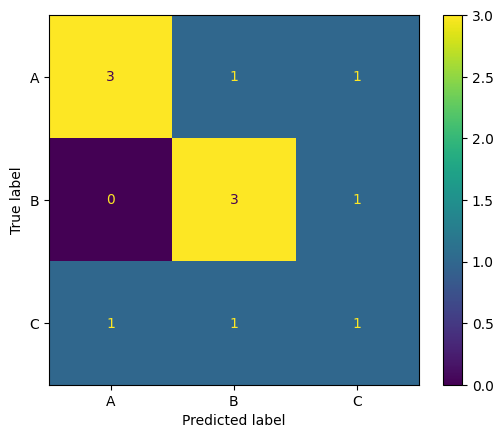

              precision    recall  f1-score   support

           A       0.75      0.60      0.67         5
           B       0.60      0.75      0.67         4
           C       0.33      0.33      0.33         3

    accuracy                           0.58        12
   macro avg       0.56      0.56      0.56        12
weighted avg       0.60      0.58      0.58        12



In [70]:
actual = ["A", "A", "A", "A", "B", "A", "B", "B", "B", "C", "C", "C"]
predicted = ["A", "A", "C", "B", "B", "A", "B", "B", "C", "B", "A", "C"]
confusion_matrix(actual, predicted)

**recall for class A > recall for class B :** FALSE

**precision for class A > precision for class C :** FALSE